In [1]:
import math


def predict_probability(x, b0, b1):
    p = 1.0 / (1.0 + math.exp(-(b0 + b1 * x)))
    return p

1.0/(1.0 + 16.8272567955368*exp(-0.62*x))


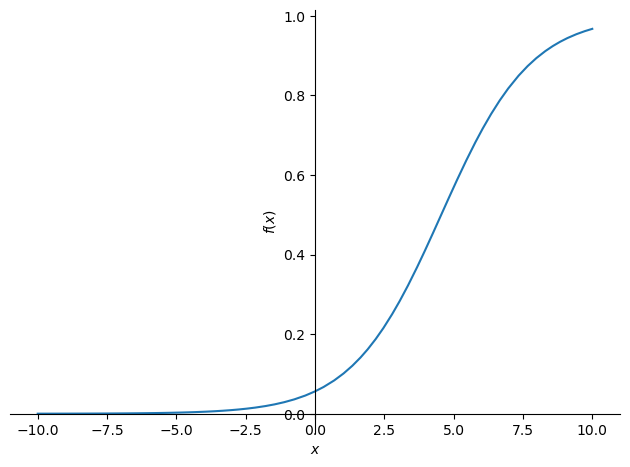

In [2]:
from sympy import *

b0, b1, x = symbols('b0 b1 x')

p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))

p = p.subs(b0, -2.823)
p = p.subs(b1, 0.620)
print(p)

plot(p)

In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('https://bit.ly/33ebs2R', delimiter=",")

X = df.values[:, :-1]
Y = df.values[:, -1]

model = LogisticRegression(penalty=None)
model.fit(X, Y)

print(model.coef_.flatten())
print(model.intercept_.flatten())

[0.69268939]
[-3.17580504]


In [4]:
import math
import pandas as pd

patient_data = pd.read_csv('https://bit.ly/33ebs2R', delimiter=",").itertuples()

b0 = -3.17576395
b1 = 0.69267212


def logistic_function(x):
    p = 1.0 / (1.0 + math.exp(-(b0 + b1 * x)))
    return p


joint_likelihood = 1.0

for p in patient_data:
    if p.y == 1.0:
        joint_likelihood *= logistic_function(p.x)
    elif p.y == 0.0:
        joint_likelihood *= (1.0 - logistic_function(p.x))

print(joint_likelihood)

4.7911180221699105e-05


In [5]:
for p in patient_data:
    joint_likelihood *= logistic_function(p.x) ** p.y * (1.0 - logistic_function(p.x)) ** (1.0 - p.y)

In [6]:
joint_likelihood = 0.0

for p in patient_data:
    joint_likelihood += math.log(logistic_function(p.x) ** p.y * (1.0 - logistic_function(p.x)) ** (1.0 - p.y))

joint_likelihood = math.exp(joint_likelihood)

In [7]:
from sympy import *

b, m, i, n = symbols('b m i n')
x, y = symbols('x y', cls=Function)
joint_likelihood = Sum(
    log((1.0 / (1.0 + exp(-(b + m * x(i))))) ** y(i) * (1.0 - (1.0 / (1.0 + exp(-(b + m * x(i)))))) ** (1 - y(i))),
    (i, 0, n))

In [8]:
from sympy import *
import pandas as pd

points = list(pd.read_csv("https://tinyurl.com/y2cocoo7").itertuples())

b1, b0, i, n = symbols('b1 b0 i n')
x, y = symbols('x y', cls=Function)
joint_likelihood = Sum(
    log((1.0 / (1.0 + exp(-(b0 + b1 * x(i))))) ** y(i) * (1.0 - (1.0 / (1.0 + exp(-(b0 + b1 * x(i)))))) ** (1 - y(i))),
    (i, 0, n))

d_b1 = diff(joint_likelihood, b1).subs(n, len(points) - 1).doit().replace(x, lambda i: points[i].x).replace(y, lambda i:
points[i].y)
d_b0 = diff(joint_likelihood, b0).subs(n, len(points) - 1).doit().replace(x, lambda i: points[i].x).replace(y, lambda i:
points[i].y)

d_b1 = lambdify([b1, b0], d_b1)
d_b0 = lambdify([b1, b0], d_b0)

b1 = 0.01
b0 = 0.01
L = .01

for j in range(10_000):
    b1 += d_b1(b1, b0) * L
    b0 += d_b0(b1, b0) * L

print(b1, b0)

0.6926693075370819 -3.1757515504098244


In [9]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

employee_data = pd.read_csv("https://tinyurl.com/y6r7qjrp")

inputs = employee_data.iloc[:, :-1]
output = employee_data.iloc[:, -1]

fit = LogisticRegression(penalty=None).fit(inputs.to_numpy(), output)

print("계수: {0}".format(fit.coef_.flatten()))
print("절편: {0}".format(fit.intercept_.flatten()))


def predict_employee_will_stay(sex, age, promotions, years_employed):
    prediction = fit.predict([[sex, age, promotions, years_employed]])
    probabilities = fit.predict_proba([[sex, age, promotions, years_employed]])
    if prediction == [[1]]:
        return "퇴사: {0}".format(probabilities)
    else:
        return "재직: {0}".format(probabilities)


while True:
    n = input("직원이 떠날지 남을지 예측하기" + "{sex},{age},{promotions},{years employed}: ")
    if n == "":
        break
    (sex, age, promotions, years_employed) = n.split(",")
    print(predict_employee_will_stay(int(sex), int(age), int(promotions), int(years_employed)))

계수: [ 0.03216406  0.03683014 -2.50414078  0.97423186]
절편: [-2.73503152]


In [10]:
from math import log, exp
import pandas as pd

patient_data = pd.read_csv('https://bit.ly/33ebs2R', delimiter=",").itertuples()

b0 = -3.17576395
b1 = 0.69267212


def logistic_function(x):
    p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))
    return p


log_likelihood_fit = 0.0

for p in patient_data:
    if p.y == 1.0:
        log_likelihood_fit += log(logistic_function(p.x))
    elif p.y == 0.0:
        log_likelihood_fit += log(1.0 - logistic_function(p.x))

print(log_likelihood_fit)

-9.946161673231583


In [11]:
log_likelihood_fit = sum(
    log(logistic_function(p.x)) * p.y + log(1.0 - logistic_function(p.x)) * (1.0 - p.y) for p in patient_data)

In [12]:
import pandas as pd
from math import log, exp

patient_data = list(pd.read_csv('https://bit.ly/33ebs2R', delimiter=",").itertuples())
likelihood = sum(p.y for p in patient_data) / len(patient_data)

log_likelihood = 0.0

for p in patient_data:
    if p.y == 1.0:
        log_likelihood += log(likelihood)
    elif p.y == 0.0:
        log_likelihood += log(1.0 - likelihood)

print(log_likelihood)

-14.341070198709906


In [13]:
log_likelihood = sum(log(likelihood) * p.y + log(1.0 - likelihood) * (1.0 - p.y) for p in patient_data)

In [14]:
import pandas as pd
from math import log, exp

patient_data = list(pd.read_csv('https://bit.ly/33ebs2R', delimiter=",").itertuples())

b0 = -3.17576395
b1 = 0.69267212


def logistic_function(x):
    p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))
    return p


log_likelihood_fit = sum(
    log(logistic_function(p.x)) * p.y + log(1.0 - logistic_function(p.x)) * (1.0 - p.y) for p in patient_data)

likelihood = sum(p.y for p in patient_data) / len(patient_data)
log_likelihood = sum(log(likelihood) * p.y + log(1.0 - likelihood) * (1.0 - p.y) for p in patient_data)

r2 = (log_likelihood - log_likelihood_fit) / log_likelihood

print(r2)

0.306456105756576


In [15]:
import pandas as pd
from math import log, exp
from scipy.stats import chi2

patient_data = list(pd.read_csv('https://bit.ly/33ebs2R', delimiter=",").itertuples())

b0 = -3.17576395
b1 = 0.69267212


def logistic_function(x):
    p = 1.0 / (1.0 + exp(-(b0 + b1 * x)))
    return p


log_likelihood_fit = sum(
    log(logistic_function(p.x)) * p.y + log(1.0 - logistic_function(p.x)) * (1.0 - p.y) for p in patient_data)

likelihood = sum(p.y for p in patient_data) / len(patient_data)
log_likelihood = sum(log(likelihood) * p.y + log(1.0 - likelihood) * (1.0 - p.y) for p in patient_data)

chi2_input = 2 * (log_likelihood_fit - log_likelihood)
p_value = chi2.pdf(chi2_input, 1)

print(p_value)

0.0016604875618753787


In [16]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

df = pd.read_csv("https://tinyurl.com/y6r7qjrp", delimiter=",")

X = df.values[:, :-1]
Y = df.values[:, -1]

kfold = KFold(n_splits=3, random_state=7, shuffle=True)
model = LogisticRegression(penalty=None)
results = cross_val_score(model, X, Y, cv=kfold)

print("정확도 평균: %.3f (표준 편차=%.3f)" % (results.mean(), results.std()))

정확도 평균: 0.611 (표준 편차=0.000)


In [17]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://bit.ly/3cManTi', delimiter=",")

X = df.values[:, :-1]
Y = df.values[:, -1]

model = LogisticRegression(solver='liblinear')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.33, random_state=10)
model.fit(X_train, Y_train)
prediction = model.predict(X_test)

matrix = confusion_matrix(y_true=Y_test, y_pred=prediction)
print(matrix)

[[6 3]
 [4 5]]


In [18]:
Y_test, prediction

(array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1]),
 array([0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1]))

In [19]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score

df = pd.read_csv("https://bit.ly/3imidqa", delimiter=",")

X = df.values[:, :-1]
Y = df.values[:, -1]

kfold = KFold(n_splits=3, shuffle=True)
model = LogisticRegression(penalty=None)
results = cross_val_score(model, X, Y, cv=kfold)

print("평균 정확도: %.3f (stdev=%.3f)" % (results.mean(), results.std()))

평균 정확도: 1.000 (stdev=0.000)


In [20]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

df = pd.read_csv("https://bit.ly/3imidqa", delimiter=",")

X = df.values[:, :-1]
Y = df.values[:, -1]

model = LogisticRegression(solver='liblinear')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.33)
model.fit(X_train, Y_train)
prediction = model.predict(X_test)

matrix = confusion_matrix(y_true=Y_test, y_pred=prediction)
print(matrix)

[[171   7]
 [  1 265]]


In [21]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv("https://bit.ly/3imidqa", delimiter=",")

X = df.values[:, :-1]
Y = df.values[:, -1]

model = LogisticRegression(solver='liblinear')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.33)
model.fit(X_train, Y_train)
prediction = model.predict(X_test)

for _ in range(2):
    n = input("색깔을 입력하세요. {red},{green},{blue}: ")
    (r, g, b) = n.split(",")
    x = model.predict(np.array([[int(r), int(g), int(b)]]))
    if model.predict(np.array([[int(r), int(g), int(b)]]))[0] == 0.0:
        print("LIGHT")
    else:
        print("DARK")

DARK


ValueError: not enough values to unpack (expected 3, got 1)